In [57]:
def user_points(prompt):    
    while True:

        try:
            user_points = (input(prompt))
            user_points = [float(i) for i in user_points.split()]

            for user in user_points:
                if user < 0: 
                    raise ValueError("value must be greater than 0")
            break
        except ValueError as err:
            print(err)
    
    
    return [user_points]
user_points("Input your coordinates")

[[23.0, 12.0]]

In [189]:
def storage_function(height, width):
    dimension = {
        "height": height,
        "width": width
    }
    return dimension

In [431]:
def sort_points_to_documents():
    with open("../Data/datapoints.txt", "r") as f_points:
        points = [point.strip("\n") for point in f_points.readlines()]

    points.pop(0)

    datapoints = [data.split(",") for data in points]
    pichu_list = []
    pika_list = []

    for datapoint in datapoints:
        datapoint = [i.strip() for i in datapoint]
        if datapoint[2] == "0":
            pichu_list.append(datapoint)
        if datapoint[2] == "1":
            pika_list.append(datapoint)

    with open("../Data/pichu.txt", "w") as f_pichu:
        for item in pichu_list:
            f_pichu.write(f"{item}\n")
    with open("../Data/pikachu.txt", "w") as f_pika:
        for item in pika_list:
            f_pika.write(f"{item}\n")


sort_points_to_documents()

In [47]:
def test_points_cleanup():
    with open("../Data/testpoints.txt", "r") as f_test_points:
        test_points_w =  f_test_points.readlines()

    test_points_w = test_points_w[1:]
    test_points_w = [line[4:-2] for line in test_points_w]
    test_points_w = [line.split(",") for line in test_points_w]
    test_points_w = [[float(a) for a in b] for b in test_points_w]
    return test_points_w

In [60]:
from turtle import color
import matplotlib.pyplot as plt
import numpy as np
import ast
import math

def pichu_or_pikachu(data = []):
    
    pichu_height_list = []
    pichu_width_list = []
    pikachu_height_list = []
    pikachu_width_list = []

    result = ""

    with open("../Data/pichu.txt", "r") as f_pichu_list:
        pichu_data_list = [ast.literal_eval(pichu) for pichu in f_pichu_list.readlines()]
       
    for item in pichu_data_list:
        pichu_height_list.append(float(item[0]))
        pichu_width_list.append(float(item[1]))

    with open("../Data/pikachu.txt", "r") as f_pikachu_list:
        pikachu_data_list = [ast.literal_eval(pika) for pika in f_pikachu_list.readlines()]

    for item in pikachu_data_list:
        pikachu_height_list.append(float(item[0]))
        pikachu_width_list.append(float(item[1]))

    diffrence = []
    pika_points_distance_list = []
    pichu_points_distance_list = []
    pichu_sample_list = []
    pika_sample_list = []


    for sample in data:
        min_distance = min((sample[0] - float(point[0]))**2 +(sample[1] - float(point[1]))**2 for point in pikachu_data_list)
        pika_points_distance_list.append(np.sqrt(min_distance))

    
    for sample in data:
        min_distance = min((sample[0] - float(point[0]))**2 +(sample[1] - float(point[1]))**2 for point in pichu_data_list)
        pichu_points_distance_list.append(np.sqrt(min_distance))


  
    a = [x1 - x2 for (x1, x2) in zip(pichu_points_distance_list, pika_points_distance_list)]

    zip_obj = zip(pichu_points_distance_list, pika_points_distance_list)
    for i in range(len(data)):
        for pichu, pika in zip_obj:
            if pichu - pika < 0 :
                pichu_sample_list.append(data[i])
                result = f"classified as Pichu"
                break
            else:
                pika_sample_list.append(data[i])
                result = f"classified as Pikachu"
                break
        diffrence.append([data[i], pichu - pika, result])

    print(*diffrence, sep="\n")


    pika_sample_height = [i[0] for i in pika_sample_list]
    pika_sample_width = [i[1] for i in pika_sample_list]
    pichu_sample_height = [i[0] for i in pichu_sample_list]
    pichu_sample_width = [i[1] for i in pichu_sample_list]


    plt.plot(pichu_sample_height, pichu_sample_width, "o", label="Pichu Sample")
    plt.plot(pichu_height_list, pichu_width_list, "1")
    plt.plot(pikachu_height_list, pikachu_width_list, "2")
    plt.plot(pika_sample_height, pika_sample_width, "*")
    plt.title(f"You entry is a: {result}")
    plt.xlabel("Width")
    plt.ylabel("Height")   
    plt.legend(["Pichu Test", "Pichu Actual", "Pikachu Actual", "Pika Test"])
 
    

[[21.959384499160468, 31.23956701424158], -1.9819472198621644, 'classified as Pichu']


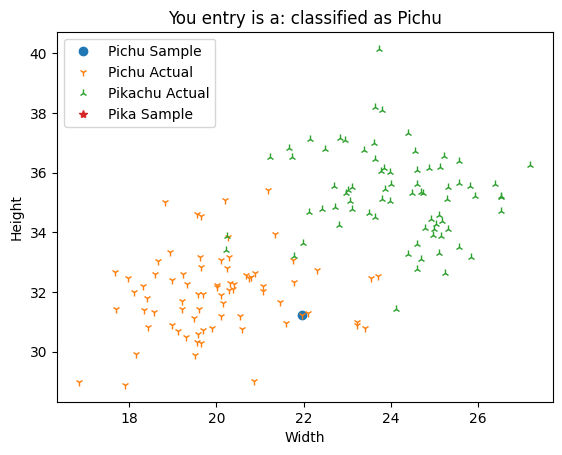

In [59]:
#sample_list = test_points_cleanup()
user_input = user_points("Input points")
pichu_or_pikachu(user_input)


[[25.0, 32.0], 0.7229749955948748, 'classified as Pikachu']
[[24.2, 31.5], 0.9374551519921464, 'classified as Pikachu']
[[22.0, 34.0], 0.2977250836734139, 'classified as Pikachu']
[[20.5, 34.0], -0.016682836299045378, 'classified as Pichu']


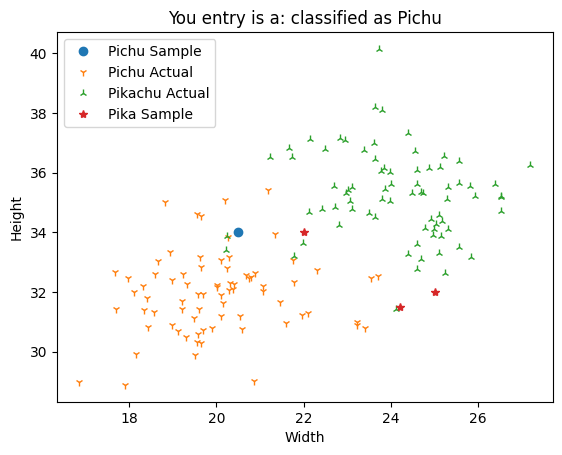

In [45]:
from turtle import color
import matplotlib.pyplot as plt
import numpy as np
import ast
import math


sample_list = test_points_cleanup()
def test_pichu_or_pikachu():
    
    pichu_height_list = []
    pichu_width_list = []
    pikachu_height_list = []
    pikachu_width_list = []

    result = ""

    with open("../Data/pichu.txt", "r") as f_pichu_list:
        pichu_data_list = [ast.literal_eval(pichu) for pichu in f_pichu_list.readlines()]
       
    for item in pichu_data_list:
        pichu_height_list.append(float(item[0]))
        pichu_width_list.append(float(item[1]))

    with open("../Data/pikachu.txt", "r") as f_pikachu_list:
        pikachu_data_list = [ast.literal_eval(pika) for pika in f_pikachu_list.readlines()]

    for item in pikachu_data_list:
        pikachu_height_list.append(float(item[0]))
        pikachu_width_list.append(float(item[1]))

    #√[(x₂ - x₁)² + (y₂ - y₁)²]


    diffrence = []
    pika_points_distance_list = []
    pichu_points_distance_list = []
    pichu_sample_list = []
    pika_sample_list = []


    for sample in sample_list:
        min_distance = min((sample[0] - float(point[0]))**2 +(sample[1] - float(point[1]))**2 for point in pikachu_data_list)
        pika_points_distance_list.append(np.sqrt(min_distance))

    
    for sample in sample_list:
        min_distance = min((sample[0] - float(point[0]))**2 +(sample[1] - float(point[1]))**2 for point in pichu_data_list)
        pichu_points_distance_list.append(np.sqrt(min_distance))


  
    a = [x1 - x2 for (x1, x2) in zip(pichu_points_distance_list, pika_points_distance_list)]

    zip_obj = zip(pichu_points_distance_list, pika_points_distance_list)
    for i in range(len(sample_list)):
        for pichu, pika in zip_obj:
            if pichu - pika < 0 :
                pichu_sample_list.append(sample_list[i])
                result = f"classified as Pichu"
                break
            else:
                pika_sample_list.append(sample_list[i])
                result = f"classified as Pikachu"
                break
        diffrence.append([sample_list[i], pichu - pika, result])

    print(*diffrence, sep="\n")

    user_points_ = user_points("Input your coordinates")
    user_array = np.array([user_points_])

    pika_sample_height = [i[0] for i in pika_sample_list]
    pika_sample_width = [i[1] for i in pika_sample_list]
    pichu_sample_height = [i[0] for i in pichu_sample_list]
    pichu_sample_width = [i[1] for i in pichu_sample_list]


    plt.plot(pichu_sample_height, pichu_sample_width, "o", label="Pichu Sample")
    plt.plot(pichu_height_list, pichu_width_list, "1")
    plt.plot(pikachu_height_list, pikachu_width_list, "2")
    plt.plot(pika_sample_height, pika_sample_width, "*")
    plt.title(f"You entry is a: {result}")
    plt.xlabel("Width")
    plt.ylabel("Height")   
    plt.legend(["Pichu Sample", "Pichu Actual", "Pikachu Actual", "Pika Sample"])
 


test_pichu_or_pikachu()

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import ast
import math


sample_list = test_points_cleanup()
def test_pichu_or_pikachu():
   


    pichu_height_list = []
    pichu_width_list = []
    pikachu_height_list = []
    pikachu_width_list = []

    result = ""

    with open("../Data/pichu.txt", "r") as f_pichu_list:
        pichu_data_list = [ast.literal_eval(pichu) for pichu in f_pichu_list.readlines()]
       
    for item in pichu_data_list:
        pichu_height_list.append(float(item[0]))
        pichu_width_list.append(float(item[1]))

    with open("../Data/pikachu.txt", "r") as f_pikachu_list:
        pikachu_data_list = [ast.literal_eval(pika) for pika in f_pikachu_list.readlines()]

    for item in pikachu_data_list:
        pikachu_height_list.append(float(item[0]))
        pikachu_width_list.append(float(item[1]))

    
    #user_points_ = user_points("Input your coordinates")
    #user_ = np.array([user_points_])
    




    #√[(x₂ - x₁)² + (y₂ - y₁)²]


    distance_pichu = 0
    pika_points_distance_list = []
    pichu_points_distance_list = []


    # for pika in pikachu_data_list:
    #     for sample in sample_list:
    #         distance_pikachu = math.sqrt((float(pika[0]) - sample[0])**2 + (float(pika[1]) - sample[1])**2)
    #     pika_points_distance_list.append(distance_pikachu)
    # pika_points_distance_list.sort()
    # print(pika_points_distance_list[0])

    # for pichu in pichu_data_list: 
    #     for sample in sample_list:
    #         distance_pichu = math.sqrt((float(pichu[0]) - sample[0])**2 + (float(pichu[1]) - sample[1])**2)
    #     pichu_points_distance_list.append(distance_pichu)
    # pichu_points_distance_list.sort()
    # print(pichu_points_distance_list[0])

    # if pichu_points_distance_list[0] < pika_points_distance_list[0]:
    #     print(f"Your entry is a pichu")
    # else:
    #     print(f"Your entry is a pikachu")

    distance_pikachu_ = []
    distance_pichu_ = []


    for sample in sample_list:
        for pika in pikachu_data_list:
            distance_pikachu = math.sqrt((sample[0] - float(pika[0]))**2 + (sample[1] - float(pika[1]))**2)
            distance_pikachu_.append(distance_pikachu)
            distance_pikachu_.sort()
        pika_points_distance_list.append(distance_pikachu_[0])

        
    for sample in sample_list:
        for pichu in pichu_data_list:
            distance_pichu = math.sqrt((sample[0] - float(pichu[0]))**2 + (sample[1] - float(pichu[1]))**2)
            distance_pichu_.append(distance_pichu)
            distance_pichu_.sort()
        pichu_points_distance_list.append(distance_pichu_[0])




    


    for i in range(len(pichu_points_distance_list)):
        for y in range(len(pika_points_distance_list)):
            if pika_points_distance_list[y] < pichu_points_distance_list[i]:
                print("pika")
                break
            else:
                print("pichu")
                break


    # for item in pikachu_sample_list:
    #     distance_pikachu = math.sqrt(((user_points_[0]) - float(item[0]))**2 + (user_points_[1] - item[1])**2)
    #     pika_point_distance_list.append(distance_pikachu)
    #     print(f"Distance to closest pikachu point: {distance_pikachu} cm")
    # print(pika_point_distance_list)
    # distance_pichu = math.sqrt((user_points_[0] - pichu_sample_list[0])**2 + (user_points_[1] - pichu_sample_list[1])**2)
    # print(f"Distance to closest pichu point: {distance_pichu} cm")

    # distance_pichu_points = 0
    # distance_pika_points = 0
        

    # for item in pika_point_distance_list:
    #     if distance_pichu < item:
    #         print("Your entry is a Pichu")
    #         result = "Pichu"
    #         break
    #     else:
    #         print("Your entry is a Pikachu")
    #         result = "Pichu"

    # data_pika = np.array([pikachu_sample_list])
    # x, y = data_pika.T
    # plt.scatter(x, y, color="green")

    # data_pichu = np.array([pichu_sample_list])
    # x, y = data_pichu.T
    # plt.scatter(x, y, color="black")

    # x, y = user_.T
    # plt.scatter(x,y,color="red", marker="P")
    
    # plt.plot(pichu_height_list, pichu_width_list, "1")
    # plt.plot(pikachu_height_list, pikachu_width_list, "2", color="gray")
    # plt.title(f"You entry is a: {result}")
    # plt.xlabel("Width")
    # plt.ylabel("Height")   
    # plt.legend(["Pichu Test", "Pikachu Test", "User Point", "Pichu Datapoints", "Pikachu Datapoints"])   
    

test_pichu_or_pikachu()

pika
pika
pichu
pichu


In [445]:
from operator import itemgetter
def election_day():
    with open("../Data/datapoints.txt", "r") as f_data:
        points = [point.strip("\n") for point in f_data.readlines()]
        points.pop(0)
        points = [data.split(",") for data in points]

    user_points_ = user_points("Input your coordinates")
    distance_points_list = []
    pichu_votes = 0
    pikachu_votes = 0
    for item in points:
        distance = math.sqrt(((user_points_[0]) - float(item[0]))**2 + ((user_points_[1]) - float(item[1]))**2)
        distance_points_list.append([distance, item[2]])

    distance_points_list = sorted(distance_points_list, key=itemgetter(0))
    distance_points_list = distance_points_list[:10]

    winner = ""
    for item in distance_points_list:
        if float(item[1]) == 1:
            pikachu_votes += 1
            winner = f"Its a pikachu with {pikachu_votes} votes"
        else:
            pichu_votes += 1
            winner = f"Its a pichu with {pichu_votes} votes"
    return winner

election_day()

'Its a pichu with 10 votes'

In [328]:
from re import I
import numpy as np
def random_collection():
    with open("../Data/datapoints.txt", "r") as f_data:
        points = [point.strip("\n") for point in f_data.readlines()]
        points.pop(0)
        points = [data.split(",") for data in points]



    Pichu_sorted_list = list(filter(lambda x: float(x[-1]) == 0, points))
    Pikachu_sorted_list = list(filter(lambda x: float(x[-1]) == 1, points))


    #50 random pichu 
    random_pichu_indices = np.random.choice(len(Pichu_sorted_list), 50)
    random_pichu_list = [Pichu_sorted_list[i] for i in random_pichu_indices]

    #50 random pikachu
    random_pikachu_indices = np.random.choice(len(Pikachu_sorted_list), 50)
    random_pikachu_list = [Pikachu_sorted_list[i] for i in random_pichu_indices]

    #25 random pichu
    random_pichu_test_indices = np.random.choice(len(Pichu_sorted_list), 25)
    random_pichu_test_data = [Pichu_sorted_list[i] for i in random_pichu_test_indices]

    
    #25 random pikachu
    random_pikachu_test_indices = np.random.choice(len(Pikachu_sorted_list), 25)
    random_pikachu_test_data = [Pikachu_sorted_list[i] for i in random_pikachu_test_indices]


    random_pichu_list.extend(random_pikachu_list)
    training_data = random_pichu_list

    random_pichu_test_data.extend(random_pikachu_test_data)
    random_test_data = random_pichu_test_data


    dis_list = []


    for t in range(len(training_data)):
        for test in random_test_data:
          distance_1 = math.sqrt((float(training_data[t][0]) - float(test[0]))**2 + (float(training_data[t][1]) - float(test[1]))**2)
        
        
        dis_list.extend([distance_1, training_data[t], test])


    dis_list.sort()
    print(dis_list)

    pichu_training_list = []
    pikachu_training_list = []
    pichu_test_list = []
    pikachu_test_list = []





    # for item in random_pichu_list:
    #     distance_1 = math.sqrt(((user_input[0]) - float(item[0]))**2 + (user_input[1] - float(item[1]))**2)
    #     pichu_training_list.append(distance_1)

    # pichu_training_list.sort()

    # for item in random_pikachu_list:
    #     distance_2 = math.sqrt(((user_input[0]) - float(item[0]))**2 + (user_input[1] - float(item[1]))**2)
    #     pikachu_training_list.append(distance_2)
    
    # pikachu_training_list.sort()

    # true_positive = 0
    # false_positive = 0
    # true_negative = 0
    # false_negative = 0

    # if pikachu_training_list[0] > pichu_training_list[0]:
    #     true_positive += 1
    # else:
    #     false_positive += 1

    # for item in random_pikachu_test_data:
    #     distance_3 = math.sqrt(((user_input[0]) - float(item[0]))**2 + (user_input[1] - float(item[1]))**2)
    #     pikachu_test_list.append(distance_2)
    
    # for item in random_pichu_test_data:
    #     distance_3 = math.sqrt(((user_input[0]) - float(item[0]))**2 + (user_input[1] - float(item[1]))**2)
    #     pichu_test_list.append(distance_2)

    # if random_pikachu_test_data[0] < random_pichu_test_data[0]:
    #     false_negative += 1
    # else:
    #     true_negative += 1

  

    
    return

random_collection()

[3.0364527427348045, ['20.795121649361587', ' 32.493051910886486', ' 0'], ['22.723629043769336', ' 34.83845262048311', ' 1'], 4.283098117898987, ['19.574019952530243', ' 31.935886159584427', ' 0'], ['22.723629043769336', ' 34.83845262048311', ' 1'], 3.6741532494368982, ['19.64717255190365', ' 32.82976709158487', ' 0'], ['22.723629043769336', ' 34.83845262048311', ' 1'], 4.0272838520679715, ['21.58631807419169', ' 30.975094109600928', ' 0'], ['22.723629043769336', ' 34.83845262048311', ' 1'], 3.097662778604125, ['21.069573240979203', ' 32.21936612110862', ' 0'], ['22.723629043769336', ' 34.83845262048311', ' 1'], 4.1103283475795, ['23.417849657642716', ' 30.787174197048245', ' 0'], ['22.723629043769336', ' 34.83845262048311', ' 1'], 5.893659156087374, ['19.510846016895872', ' 29.897476657136767', ' 0'], ['22.723629043769336', ' 34.83845262048311', ' 1'], 2.1478426846918244, ['22.30210323807139', ' 32.73237945145149', ' 0'], ['22.723629043769336', ' 34.83845262048311', ' 1'], 3.181767641